# Lectura de los datos

## Datos originales

Los datos usados hacen parte de un repositorio abierto con licencia Creative Commons Attribution, que contiene mediciones de radiación horizontal global solar (GHI), recopiladas durante un periodo de 18 años, desde el 1 de enero de 2002 hasta el 31 de diciembre de 2019, con una granularidad de 30 minutos, que fueron medidos en 37 estaciones ubicadas en la región española de Castilla y León. El conjunto de datos no solo cuenta con datos crudos, sino también con datos refinados y etiquetados por estaciones de medición, contando además con variables meteorológicas y geográficas que complementan el valor de los datos de irradiación.

Los datos fueron publicados por integrantes del Departamento de Ingeniería Topográfica y Cartográfica de la Escuela Técnica Superior de Ingenieros en Topografía, Geodesia y Cartografía, Universidad Politécnica de Madrid, y se encuentran disponibles para su uso con fines de investigación en un repositorio público con nombre “CyL_GHI” disponible en el sitio web Zenodo (https://zenodo.org/records/7404167), y además cuentan con una documentación detallada con nombre “CyL-GHI: Global Horizontal Irradiance Dataset Containing 18 Years of Refined Data at 30-Min Granularity from 37 Stations Located in Castile and León (Spain)”, que describe de manera precisa mucho del preprocesamiento, estandarización y limpieza realizado por los autores.


In [ ]:
# Lectura de archivos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Lectura datos GHI
df_ghi = pd.read_csv("drive/MyDrive/3_Seminario/Momentos evaluativos/ME04/CyL_GHI_ast.csv", header = 0, sep = ',')
# Lectura datos ubicación estaciones
df_geo = pd.read_csv("drive/MyDrive/3_Seminario/Momentos evaluativos/ME04/CyL_geo.csv", header = 0, sep = ',', index_col=0)
# Lectura datos meteorológicos por estaciones
df_meteo = pd.read_csv("drive/MyDrive/3_Seminario/Momentos evaluativos/ME04/CyL_meteo.csv", header = 0, sep = ',')

### Revisión datos de posicionamiento geográfico

In [ ]:
df_geo.dtypes

station_code     object
name             object
latitude        float64
longitude       float64
height            int64
dtype: object

Inicialmente, el objetivo es analizar y entender la estructura de la tabla maestra de datos en el dataframe `df_geo`.

Este dataframe cuenta con 5 columnas:
* **station_code:** Corresponde a un código único asignado a cada una de las estaciones. Tal como se hizo mención previamente existen 37 códigos difentes asociados a cada estación meteorológica.
* **name:** Hace referencia al nombre de la estación de acuerdo a su ubicación en la región de Castilla y León.
* **latitude:** Indica en formato coma flotante, la latitud en la cual se encuentra la estación meteorológica.
* **longitude:** Indica en formato coma flotante, la longitud en la cual se encuentra la estación meteorológica.
* **height:** Indica en formato entero, la altitud a la cual se encuentra la estación meteorológica sobre el nivel del mar.

In [ ]:
df_geo

,station_code,name,latitude,longitude,height
0,AV01,Nava de Arévalo,40.968828,-4.767943,921
1,BU02,Valle de Valdelucio,42.746260,-4.132867,976
2,BU03,Lerma,42.039658,-3.768196,840
3,BU04,Tardajos,42.346138,-3.802584,822
4,BU05,Vadocondes,41.637103,-3.576803,811
5,LE01,Carracedelo,42.565289,-6.721714,463
6,LE02,Mansilla mayor,42.506515,-5.432672,791
7,LE03,Cubillas de los Oteros,42.396113,-5.507407,772
8,LE04,Zotes del Páramo,42.257628,-5.736952,776
9,LE05,Quintana del Marco,42.218201,-5.839216,750


Al visualizar el dataframe completo, se confirma un total de 37 estaciones meteorológicas, donde se tienen códigos únicos alfanuméricos asignados para cada una de las estaciones, los nombres de cada estación así como los datos de ubicación geográfica antes mencionados.

### Revisión de datos de medición de GHI y valores astronómicos

In [ ]:
df_ghi.dtypes

timestamp         object
GHI_ZA02         float64
sun_elev_ZA02    float64
toa_ZA02         float64
sun_azim_ZA02    float64
                  ...   
sun_azim_VA03    float64
GHI_LE08         float64
sun_elev_LE08    float64
toa_LE08         float64
sun_azim_LE08    float64
Length: 149, dtype: object

En cuanto a la estructura del dataframe de radiación solar `df_ghi`, se observa que cuenta con un total de 149 columnas, que corresponden al total de estaciones (37) multiplicado por el total de variables medidas en cada estación (4), más 1 columna con nombre *timestamp* que indica la marca de tiempo. Las variables que se tienen en cuenta son:
* **GHI:** Radiación horizontal global solar ($W/m^{2}$)
* **sun_elev:** Elevación solar (°)
* **toa:** Radiación solar atmosférica superior ($W/m^{2}$)
* **sun_azim:** Azimut solar (°)

$Total\ columnas = 37 \bullet 4 + 1 = 149$

Para diferenciar los datos correspondientes a cada estación meteorológica, se hace uso de sufijos con un guión bajo ("_"), agregando el código de la estación que concuerda con el relacionado en la tabla maestra de ubicación. Por lo cual, para cada "station_code" asociado en el dataframe `df_geo` se tienen 4 columnas:
  * GHI_{station_code}
  * sun_elev_{station_code}
  * toa_{station_code}
  * sun_azim_{station_code}

Cada una de las 148 variables numéricas se encuentran en formato coma flotante (`float64`), mientras que por defecto pandas interpreta la columna "timestamp" como `object`, por lo que se debe realizar una transformación previa de los datos a `datetime64` por medio de la función `pandas.to_datetime()`.

In [ ]:
# Se actualiza la columna timestamp a datetime64
df_ghi['timestamp'] = pd.to_datetime(df_ghi['timestamp'], format = '%Y-%m-%d %H:%M:%S')
df_ghi.dtypes

timestamp        datetime64[ns]
GHI_ZA02                float64
sun_elev_ZA02           float64
toa_ZA02                float64
sun_azim_ZA02           float64
                      ...      
sun_azim_VA03           float64
GHI_LE08                float64
sun_elev_LE08           float64
toa_LE08                float64
sun_azim_LE08           float64
Length: 149, dtype: object

In [ ]:
print(f"Cantidad de filas del dataframe df_ghi: {df_ghi.shape[0]}")
print(f"Los datos representan mediciones realizadas entre '{df_ghi['timestamp'].min()}' y '{df_ghi['timestamp'].max()}'")

Cantidad de filas del dataframe df_ghi: 315600 filas
Los datos representan mediciones realizadas entre '2002-01-01 00:00:00' y '2020-01-01 23:30:00'


### Revisión de datos meteorológicos


In [ ]:
df_meteo.dtypes

timestamp              object
air_temp_ZA02         float64
humidity_ZA02         float64
wind_sp_ZA02          float64
wind_dir_ZA02         float64
                       ...   
air_temp_LE08         float64
humidity_LE08         float64
wind_sp_LE08          float64
wind_dir_LE08         float64
precipitation_LE08    float64
Length: 186, dtype: object

En cuanto a la estructura del dataframe de radiación solar `df_meteo`, se observa que cuenta con un total de 186 columnas, que corresponden al total de estaciones (37) multiplicado por el total de variables medidas en cada estación (5), más 1 columna con nombre *timestamp* que indica la marca de tiempo. Las variables que se tienen en cuenta son:
* **air_temp:** Temperatura del aire (°C)
* **humidity:** Humedad relativa (%)
* **wind_sp:** Velocidad del viento ($m/s$)
* **wind_dir:** Dirección del viento (°)
* **precipitation:** Precipitaciones (mm)

$Total\ columnas = 37 \bullet 5 + 1 = 186$

Para diferenciar los datos correspondientes a cada estación meteorológica, igualmente se hace uso de sufijos con un guión bajo ("_"), agregando el código de la estación que concuerda con el relacionado en la tabla maestra de ubicación. Por lo cual, para cada "station_code" asociado en el dataframe `df_geo` se tienen 5 columnas:
  * air_temp_{station_code}
  * humidity_{station_code}
  * wind_sp_{station_code}
  * wind_dir_{station_code}
  * precipitation_{station_code}

Cada una de las 185 variables numéricas se encuentran en formato coma flotante (`float64`), mientras que por defecto pandas interpreta la columna "timestamp" como `object`, por lo que se debe realizar una transformación previa de los datos a `datetime64` por medio de la función `pandas.to_datetime()`.

In [ ]:
# Marcas de tiempo en formato datetime para cada dataframe
df_meteo['timestamp'] = pd.to_datetime(df_meteo['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df_meteo.dtypes

timestamp             datetime64[ns]
air_temp_ZA02                float64
humidity_ZA02                float64
wind_sp_ZA02                 float64
wind_dir_ZA02                float64
                           ...      
air_temp_LE08                float64
humidity_LE08                float64
wind_sp_LE08                 float64
wind_dir_LE08                float64
precipitation_LE08           float64
Length: 186, dtype: object

In [ ]:
print(f"Cantidad de filas del dataframe df_meteo: {df_meteo.shape[0]}")
print(f"Los datos representan mediciones realizadas entre '{df_meteo['timestamp'].min()}' y '{df_meteo['timestamp'].max()}'")

Cantidad de filas del dataframe df_meteo: 315600
Los datos representan mediciones realizadas entre '2002-01-01 00:00:00' y '2020-01-01 23:30:00'


In [ ]:
df_ghi.head()

,timestamp,GHI_ZA02,sun_elev_ZA02,toa_ZA02,sun_azim_ZA02,GHI_LE05,sun_elev_LE05,toa_LE05,sun_azim_LE05,GHI_SO01,...,toa_VA06,sun_azim_VA06,GHI_VA03,sun_elev_VA03,toa_VA03,sun_azim_VA03,GHI_LE08,sun_elev_LE08,toa_LE08,sun_azim_LE08
0,2002-01-01 00:00:00,0.0,-70.96,0.0,343.92,0.0,-70.21,0.0,343.97,0.0,...,0.0,345.71,0.0,-71.31,0.0,346.46,0.0,-70.21,0.0,346.26
1,2002-01-01 00:30:00,0.0,-71.48,0.0,5.40,0.0,-70.76,0.0,4.66,0.0,...,0.0,7.26,0.0,-71.57,0.0,8.23,0.0,-70.55,0.0,6.88
2,2002-01-01 01:00:00,0.0,-69.95,0.0,25.89,0.0,-69.35,0.0,24.56,0.0,...,0.0,27.49,0.0,-69.78,0.0,28.48,0.0,-68.95,0.0,26.36
3,2002-01-01 01:30:00,0.0,-66.77,0.0,42.59,0.0,-66.32,0.0,41.08,0.0,...,0.0,43.82,0.0,-66.40,0.0,44.70,0.0,-65.80,0.0,42.41
4,2002-01-01 02:00:00,0.0,-62.53,0.0,55.35,0.0,-62.22,0.0,53.91,0.0,...,0.0,56.29,0.0,-62.02,0.0,57.01,0.0,-61.64,0.0,54.88


In [ ]:
df_meteo.head()

,timestamp,air_temp_ZA02,humidity_ZA02,wind_sp_ZA02,wind_dir_ZA02,precipitation_ZA02,air_temp_LE05,humidity_LE05,wind_sp_LE05,wind_dir_LE05,...,air_temp_VA03,humidity_VA03,wind_sp_VA03,wind_dir_VA03,precipitation_VA03,air_temp_LE08,humidity_LE08,wind_sp_LE08,wind_dir_LE08,precipitation_LE08
0,2002-01-01 00:00:00,7.38,90.64,3.16,135.56,0.0,5.75,95.21,1.28,139.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-01-01 00:30:00,5.91,96.70,0.63,314.74,0.0,4.55,95.89,0.51,303.10,...,8.22,90.79,0.51,65.34,0.02,NaN,NaN,NaN,NaN,NaN
2,2002-01-01 01:00:00,5.63,96.72,0.72,320.45,0.0,4.46,95.80,0.50,47.80,...,7.43,92.17,1.49,189.70,0.00,NaN,NaN,NaN,NaN,NaN
3,2002-01-01 01:30:00,5.40,96.90,0.70,299.74,0.0,4.37,95.80,0.29,309.32,...,7.12,95.14,1.75,127.49,0.00,NaN,NaN,NaN,NaN,NaN
4,2002-01-01 02:00:00,5.33,96.91,0.60,272.80,0.0,4.27,95.80,0.45,237.62,...,7.38,94.12,0.53,69.07,0.00,NaN,NaN,NaN,NaN,NaN


## Datasets



Obtenemos el listado de todos los códigos de las estaciones de medición, esto con el fin de seleccionar de manera dinámica los datos en los dataframes de GHI y datos meteorológicos.

<Axes: xlabel='timestamp'>

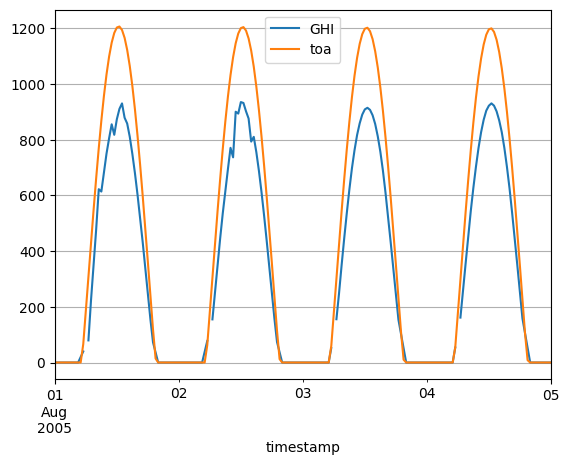

In [ ]:
df[(df['timestamp'].between('2005-08-01', '2005-08-05')) & (df['label'] == 'P04')][['timestamp', 'GHI', 'toa']].plot(
      x = 'timestamp',
      y = ['GHI', 'toa'],
      legend = True,
      grid = True)

Se observa que las horas presentan mediciones realizadas en espacios de 30 minutos y que el formato de horas para las 00:00 se encuentra con un valor 24:00 que corresponde a una hora del día siguiente. Por tanto es necesario ajustar las fechas para estas horas y posteriormente

In [ ]:
# Se realiza la lectura del archivo CSV
df = pd.read_csv('SolarPrediction.csv', sep = ',', header = 0)

In [ ]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
# Observamos los tipos de dato
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

Inicialmente se observa que el dataset incluye columnas `UNIXTime`, `Data`, `Time`, `TimeSunRise` y `TimeSunSet`, estas columnas representan marcas de tiempo que deben ser inicialmente ajustadas.

Si revisamos los tipos de dato para estas columnas, se observa que por defecto al realizar la lectura del CSV, *Pandas* asigna tipos de dato `object` (o `int64` para el caso de UNIXTime), por tanto iniciaremos por realizar transformaciones a estas columnas.

Para realizar la transformación de la columna UNIXTime, primero buscamos incluir una breve descripción de este valor.

De acuerdo a lo indicado en el sitio https://kb.narrative.io/what-is-unix-time, el Unix Time es un sistema para representar un punto en el tiempo contando el número de segundos que han pasado desde `1970-01-01 00:00:00` siendo este momento en el tiempo el valor *0*.

En python podemos realizar la conversión de formato Unix Time a marca de tiempo, por medio de la función `datetime.datetime.fromtimestamp()`.

In [ ]:
# Creamos una nueva columna con nombre DatetimeUTC
df['DatetimeUTC'] = df['UNIXTime'].apply(lambda t: datetime.datetime.fromtimestamp(t))
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DatetimeUTC
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,2016-12-01 10:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2016-12-01 10:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,2016-12-01 10:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,2016-12-01 10:05:02


Para la columna *Data*, se observa que se tienen las fechas locales de medición pero con una hora correspondiente a las `00:00:00`, dado que la hora correspondiente se encuentra en la columna *Time*. Por lo que crearemos una columna *DatetimeLocal* uniendo estas dos columnas y convirtiendo a marca de tiempo por medio de la función `pd.to_datetime()`. Para ello además indicamos el formato a leer la fecha a partir del string por medio de la referencia disponible en https://strftime.org/.

In [ ]:
df['DatetimeLocal'] = pd.to_datetime(df['Data'].str.replace('12:00:00 AM', '') + df['Time'], format = '%m/%d/%Y %H:%M:%S')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DatetimeUTC,DatetimeLocal
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26,2016-09-29 23:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23,2016-09-29 23:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26,2016-09-29 23:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21,2016-09-29 23:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24,2016-09-29 23:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,2016-12-01 10:20:04,2016-12-01 00:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2016-12-01 10:15:01,2016-12-01 00:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,2016-12-01 10:10:01,2016-12-01 00:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,2016-12-01 10:05:02,2016-12-01 00:05:02


De acuerdo a la información disponible en https://www.timeanddate.com/worldclock/usa/honolulu, las islas de Hawaii se encuentran en una zona horaria con UTC-10, esto puede ser verificado obteniendo la diferencia entre las columnas *DatetimeUTC* y *DatetimeLocal*.

Por último realizamos una conversión de las columnas *TimeSunRise* y *TimeSunSet* con el fin de asignar una marca de tiempo. Para ello concatenamos las horas de cada columna con la fecha relacionada en la columna *Data*, de manera similar a como lo hicimos para obtener la columna *DatetimeLocal*.

In [ ]:
df['Temperature'] = (df['Temperature'] - 32) * (5/9)
df['Speed'] = df['Speed'] * 0.44704

In [ ]:
# Reordenamos y seleccionamos las columnas que usaremos
df_prep = df[['DatetimeUTC', 'DatetimeLocal', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']].copy()
df_prep

,DatetimeUTC,DatetimeLocal,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-30 09:55:26,2016-09-29 23:55:26,1.21,8.888889,30.46,59,177.39,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00
1,2016-09-30 09:50:23,2016-09-29 23:50:23,1.21,8.888889,30.46,58,176.78,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00
2,2016-09-30 09:45:26,2016-09-29 23:45:26,1.23,8.888889,30.46,57,158.75,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00
3,2016-09-30 09:40:21,2016-09-29 23:40:21,1.21,8.888889,30.46,60,137.71,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00
4,2016-09-30 09:35:24,2016-09-29 23:35:24,1.17,8.888889,30.46,62,104.95,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01 10:20:04,2016-12-01 00:20:04,1.22,6.666667,30.43,102,145.42,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00
32682,2016-12-01 10:15:01,2016-12-01 00:15:01,1.17,6.666667,30.42,102,117.78,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00
32683,2016-12-01 10:10:01,2016-12-01 00:10:01,1.20,6.666667,30.42,102,145.19,4.023360,2016-12-01 06:41:00,2016-12-01 17:42:00
32684,2016-12-01 10:05:02,2016-12-01 00:05:02,1.23,6.666667,30.42,101,164.19,3.518205,2016-12-01 06:41:00,2016-12-01 17:42:00


In [ ]:
df_prep.dtypes

DatetimeUTC               datetime64[ns]
DatetimeLocal             datetime64[ns]
Radiation                        float64
Temperature                      float64
Pressure                         float64
Humidity                           int64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise               datetime64[ns]
TimeSunSet                datetime64[ns]
dtype: object

## Análisis descriptivo de los datos

In [ ]:
df_prep.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,10.612920,30.422879,75.016307,143.489821,2.791259
std,315.916387,3.445087,0.054673,25.990219,83.167500,1.560381
min,1.110000,1.111111,30.190000,8.000000,0.090000,0.000000
25%,1.230000,7.777778,30.400000,56.000000,82.227500,1.506525
50%,2.660000,10.000000,30.430000,85.000000,147.700000,2.512365
75%,354.235000,12.777778,30.460000,97.000000,179.310000,3.518205
max,1601.260000,21.666667,30.560000,103.000000,359.950000,18.105120


In [ ]:
print(f"La primera medición registrada en el conjunto de datos es '{df_prep['DatetimeLocal'].min()}' (fecha y hora local de Hawaii)")
print(f"La última medición registrada en el conjunto de datos es '{df_prep['DatetimeLocal'].max()}' (fecha y hora local de Hawaii)")

La primera medición registrada en el conjunto de datos es '2016-09-01 00:00:08' (fecha y hora local de Hawaii)
La última medición registrada en el conjunto de datos es '2016-12-31 23:55:01' (fecha y hora local de Hawaii)


La descripción generada con la método `.describe()` de la clase DataFrame de Pandas, indica que:

* El conteo de registros para todas las columnas sugiere que no existen valores nulos ya que todos presentan un total de 32686 datos registrados.
* La radiación media obtenida en el espacio de tiempo en el que se realizaron las mediciones es de aproximadamente $207.12\ W/m^{2}$, con un valor máximo medido de $1601.26\ W/m^{2}$.
* La temperatura media obtenida en el espacio de tiempo en el que se realizaron las mediciones es de aproximadamente $10.6\ °C$.
* La presión barométrica media obtenida es de aproximadamente $30.4 Hg$ con una baja desviación estándar.
* El porcentaje de humedad relativa media es de aproximadamente 75%.
* La dirección del viento media es de aproximadamente 143.5° con una velocidad de aproximadamente $2.79 m/s$.
* Las mediciones fueron realizadas en un rango de tiempo entre el 1 de septiembre de 2016 y el 31 de diciembre del mismo año.

Primero analizaremos el comportamiento de la radiación solar a lo largo de un día, para ello tomarémos como ejemplo un día de mediciones realizadas.

In [ ]:
dia_mediciones = '2016-09-01'

In [ ]:
df_prep[df_prep.DatetimeLocal.between(f'{dia_mediciones} 00:00:00', f'{dia_mediciones} 23:59:59')].sort_values(by='DatetimeLocal')[['DatetimeLocal', 'Radiation']]

,DatetimeLocal,Radiation
7416,2016-09-01 00:00:08,2.58
7415,2016-09-01 00:05:10,2.83
7414,2016-09-01 00:20:06,2.16
7413,2016-09-01 00:25:05,2.21
7412,2016-09-01 00:30:09,2.25
...,...,...
7171,2016-09-01 23:35:04,1.79
7170,2016-09-01 23:40:08,3.15
7169,2016-09-01 23:45:03,3.30
7168,2016-09-01 23:50:03,2.42


Se observa inicialmente que las mediciones fueron realizadas en espacios de tiempo de aproximadamente 5 minutos, y un primer vistazo a los datos muestra además existen momentos en esos espacios de 5 minutos en los cuales no se tienen mediciones.

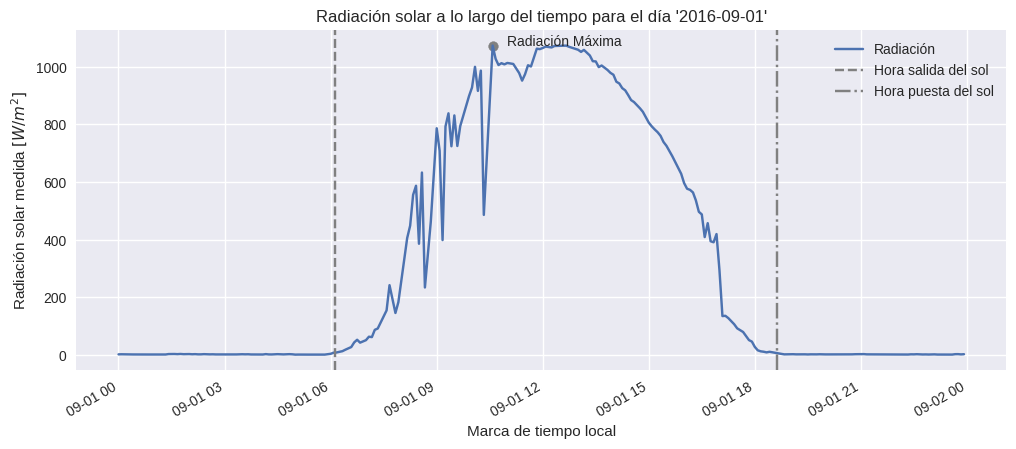

In [ ]:
# Configuración de estilo de gráficos
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('seaborn-v0_8')

# Gráfico a lo largo del tiempo para un día
df_prep[df_prep.DatetimeLocal.between(f'{dia_mediciones} 00:00:00', f'{dia_mediciones} 23:59:59')].plot(
    x = 'DatetimeLocal',
    y = 'Radiation',
    grid = True,
    label='Radiación',
    figsize = (12, 5),
    fontsize = 10)

# Obtenemos el valor máximo de radiación medido en el día
df_prep_day = df_prep[df_prep.DatetimeLocal.between(f'{dia_mediciones} 00:00:00', f'{dia_mediciones} 23:59:59')]
df_prep_max_rad = df_prep_day[df_prep_day.Radiation == df_prep_day.Radiation.max()]

# Radiación máxima medida en el día
plt.scatter(df_prep_max_rad['DatetimeLocal'], df_prep_max_rad['Radiation'], c='gray')
plt.annotate('Radiación Máxima', (df_prep_max_rad['DatetimeLocal'], df_prep_max_rad['Radiation']),
             textcoords="offset points", xytext=(10,0), ha='left')

# Horas de salida y puesta del sol
plt.axvline(x=df_prep_max_rad['TimeSunRise'], color='gray', linestyle='--', label = 'Hora salida del sol')
plt.axvline(x=df_prep_max_rad['TimeSunSet'], color='gray', linestyle='-.', label = 'Hora puesta del sol')

plt.xlabel('Marca de tiempo local')
plt.ylabel('Radiación solar medida $[W/m^{2}]$')
plt.title(f'Radiación solar a lo largo del tiempo para el día \'{dia_mediciones}\'')
plt.legend()
plt.show()

Se observa que a partir de la hora de salida del sol se tiene un aumento de la radiación solar hasta las 12:00 PM donde empieza a disminuir hasta la hora de puesta del sol. Adicionalmente, las variaciones no tan facilmente predecibles a lo largo del día, pueden tener explicación en factores meteorológicos específicos presentados en la ubicación de la estación de medición HI-SEAS.

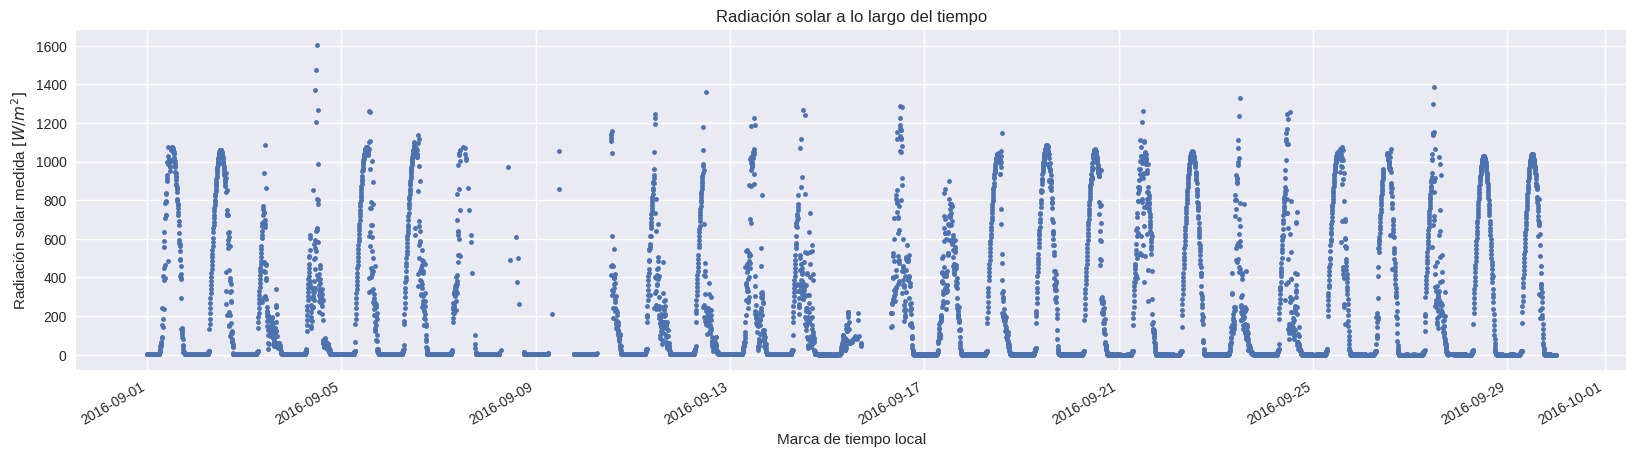

In [ ]:
# Se genera un gráfico teniendo en cuenta todo un mes
df_prep[df_prep.DatetimeLocal.between('2016-09-01', '2016-09-30')].plot(
    x = 'DatetimeLocal',
    y = 'Radiation',
    grid = True,
    style = '.',
    figsize = (20, 5),
    legend = False)
plt.xlabel('Marca de tiempo local')
plt.ylabel('Radiación solar medida $[W/m^{2}]$')
plt.title('Radiación solar a lo largo del tiempo')
plt.show()

Al generar un gráfico de todo el mes de septiembre de 2016 se observa un comportamiento similar en el día a día con claras variaciones de la medicición de radiación presentadas a lo largo de cada día. Se ve claramente que hay datos faltantes.

In [ ]:
# Realizamos un listado de muestras esperadas con frecuencia de 5 minutos
s = pd.date_range(start=df_prep['DatetimeLocal'].min(), end=df_prep['DatetimeLocal'].max(), freq='5min', inclusive='both')

# Comparamos con la cantidad de registros reales en nuestro dataframe
faltantes = len(s) - len(df_prep['DatetimeLocal'])

print(f"Cantidad de registros esperados: {len(s)}")
print(f"Cantidad de registros medidos: {len(df_prep['DatetimeLocal'])}")
print(f"Cantidad de registros faltantes: {faltantes}")
print(f"Porcentaje de faltantes: {(faltantes/len(s))*100}%")

Cantidad de registros esperados: 35135
Cantidad de registros medidos: 32686
Cantidad de registros faltantes: 2449
Porcentaje de faltantes: 6.970257577913761%


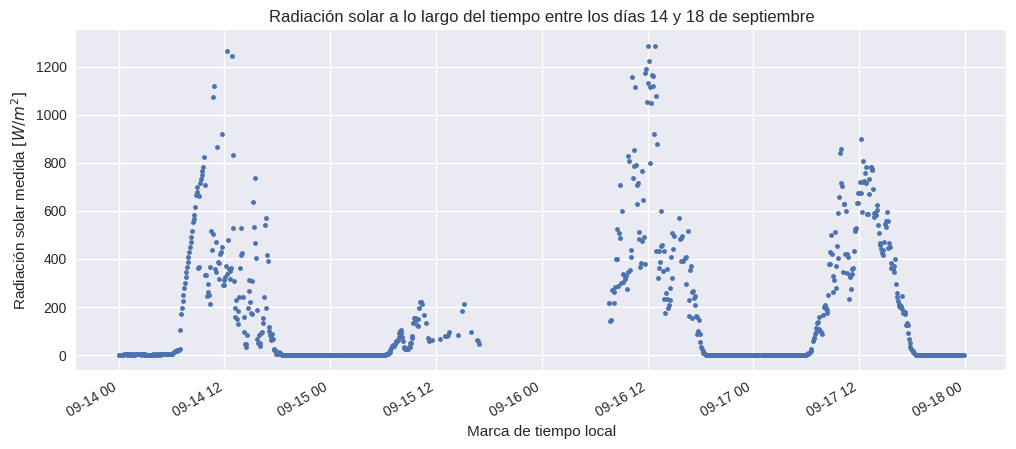

In [ ]:
# Gráfico para los días 14 y 18 de septiembre 2016
df_prep[df_prep.DatetimeLocal.between('2016-09-14', '2016-09-18')].plot(
    x = 'DatetimeLocal',
    y = 'Radiation',
    grid = True,
    style = '.',
    figsize = (12, 5),
    legend = False,
    )
plt.xlabel('Marca de tiempo local')
plt.ylabel('Radiación solar medida $[W/m^{2}]$')
plt.title('Radiación solar a lo largo del tiempo entre los días 14 y 18 de septiembre')
plt.show()

Con el objetivo de complementar el conjunto de datos, se busca mediante el desarrollo de una función obtener la radiación solar insidente teórica para una latitud y longitud específicas.

De acuerdo a lo comentado en ["Cálculo de la radiación solar
extraterrestre en función de la
latitud y la declinación solar"](https://m.riunet.upv.es/bitstream/handle/10251/68296/Bautista%20-%20C%C3%A1lculo%20de%20la%20radiaci%C3%B3n%20solar%20extraterrestre%20en%20funci%C3%B3n%20de%20la%20latitud%20y%20la%20declinaci%C3%B3n....pdf?sequence=1&isAllowed=y) es posible obtener dicho valor mediante ecuaciones que describen la radiación solar teórica extraterreste.

Según sitio https://geohack.toolforge.org/geohack.php?pagename=HI-SEAS&params=19.602378_N_155.487192_W_, la ubicación de la estación de medición de HI-SEAS es `(19.602378, -155.487192)`.

In [ ]:
# Ubicación de la estación meteorológica de Hawaii
latitud = 19.602378
longitud = -155.487192
longitud_uso = -150 # Longitud del uso horario

In [ ]:
def radiacion_solar_S0(dia_anho):
    """
    Obtiene el valor del parámetro solar S0 o densidad de flujo de la radiación
    que se recibe sobre una superficie perpendicular a los rayos solares para
    un día del año de 1 a 365.
    """
    dia_ref = 81  # 22 de marzo
    if dia_anho < 81:
        D = 365 - dia_ref + dia_anho
    else:
        D = dia_anho - dia_ref
    constante_solar = 1367.
    distancia_media_sol = 149597870000.  # metros

    d = (1.496 * 10 ** 11) * (1 - 0.017 * mt.sin(mt.radians(0.9856 * D)))
    return constante_solar * ((distancia_media_sol / d) ** 2)


def declinacion_solar(dia_anho):
    """
    Obtiene la posición relativa del sol respecto a la superficie de la tierra
    en un día específico del año de 1 a 365.
    """
    return 23.5 * mt.cos(mt.radians((360 * (dia_anho - 172) / 365.)))

def hora_solar(dia_anho, hora, longitud, longitud_del_uso, adelanto_hora_verano=0):
    """
    Realiza una corrección astronómica de la hora del día convencional
    transformandola en la hora solar.
    """
    M = dia_anho * 2. * mt.pi / 365.24
    EoT = 229.19 * (-0.0334 * mt.sin(mt.radians(M)) + 0.04184 * mt.sin(mt.radians(2 * M + 3.5884)))
    return 15 * (hora - adelanto_hora_verano - 12) + (longitud - longitud_del_uso) + EoT / 4.0

def radiacion_solar_teorica(dia, hora, latitud, longitud, longitud_uso_horario, hora_verano=0):
    """
    Obtiene la radiación solar teórica para un punto de la tierra, teniendo en
    cuenta la ubicación geográfica, la declinación, el parámetro solar S0 y la
    hora solar.
    """
    S0 = radiacion_solar_S0(dia)
    inc = declinacion_solar(dia)
    w = hora_solar(dia, hora, longitud, longitud_uso_horario, hora_verano)
    S = S0 * mt.sin(mt.radians(90 - latitud + inc)) * mt.cos(mt.radians(w))
    return S if S>=0 else 0


Agregamos la columna `TheoreticalRadiation` para incluir la radiación teórica a partir de la función `radiacion_solar_teorica()`

In [ ]:
df_prep["TheoreticalRadiation"] = df_prep.apply(lambda row : radiacion_solar_teorica(row['DatetimeLocal'].dayofyear,
                     row["DatetimeLocal"].hour + row["DatetimeLocal"].minute/60., latitud, longitud, longitud_uso), axis = 1)

df_prep

,DatetimeUTC,DatetimeLocal,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,TheoreticalRadiation
0,2016-09-30 09:55:26,2016-09-29 23:55:26,1.21,8.888889,30.46,59,177.39,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
1,2016-09-30 09:50:23,2016-09-29 23:50:23,1.21,8.888889,30.46,58,176.78,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
2,2016-09-30 09:45:26,2016-09-29 23:45:26,1.23,8.888889,30.46,57,158.75,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
3,2016-09-30 09:40:21,2016-09-29 23:40:21,1.21,8.888889,30.46,60,137.71,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
4,2016-09-30 09:35:24,2016-09-29 23:35:24,1.17,8.888889,30.46,62,104.95,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01 10:20:04,2016-12-01 00:20:04,1.22,6.666667,30.43,102,145.42,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
32682,2016-12-01 10:15:01,2016-12-01 00:15:01,1.17,6.666667,30.42,102,117.78,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
32683,2016-12-01 10:10:01,2016-12-01 00:10:01,1.20,6.666667,30.42,102,145.19,4.023360,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
32684,2016-12-01 10:05:02,2016-12-01 00:05:02,1.23,6.666667,30.42,101,164.19,3.518205,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0


Se realiza la simulación de la radiación solar teórica esparada a lo largo del año por horas del día en el espacio de tiempo donde se realizaron las mediciones, es decir entre 2016-09-01 y 2016-12-31.

In [ ]:
# Se genera una matriz de ceros 366 (año bisiesto) días por 24 horas
radiacion_theo = np.zeros((366, 24))

# Se actualizan los valores de la matriz de acuerdo la radiación solar teórica
for i, dia in enumerate(np.arange(0, 366)):
    if dia >= 245: # 2016-09-01 corresponde al día 245 del año
        for j, hora in enumerate(np.arange(0, 24)):
            s = radiacion_solar_teorica(dia, hora, latitud, longitud, longitud_uso)
            if s < 0:
                s = 0
            radiacion_theo[i][j] = s

In [ ]:
df_grouped = df_prep.groupby([df['DatetimeLocal'].dt.date, df['DatetimeLocal'].dt.hour])[['Radiation']].mean().copy()
df_grouped.index.names = ['DateLocal', 'HourLocal']
df_grouped.reset_index(inplace = True)
df_grouped['DayOfYear'] = pd.to_datetime(df_grouped['DateLocal'], format='%Y-%m-%d').dt.strftime('%j').astype(int)

radiacion = np.zeros((366, 24)) # 366 días dado que es un año bisiesto
for _, row in df_grouped.iterrows():
    radiacion[row['DayOfYear']-1][row['HourLocal']] = row['Radiation']

Se realizó una comparación entre la radiación solar medida y la radición solar teórica, evidenciando diferencias principalmente atribuibles a condiciones meteorológicas de la zona. Se evidencia particularmente que la radiación solar teórica es más alta que la radiación solar medida en las franjas entre las 12 y las 14 horas.

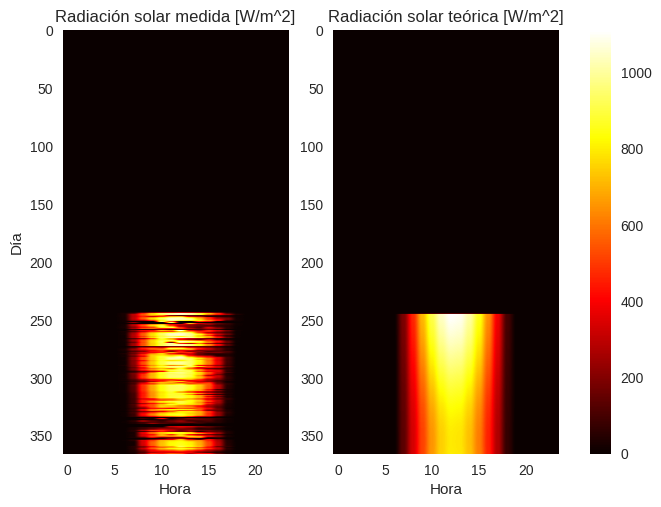

In [ ]:
fig, axs = plt.subplots(1, 2)

# Gráfico de radiación solar medida
im = axs[0].imshow(radiacion, aspect='auto', cmap='hot')
axs[0].set_xlabel('Hora')
axs[0].set_ylabel('Día')
axs[0].set_title('Radiación solar medida [W/m^2]')
axs[0].grid(False)

# Gráfico de radiación solar teórica
im2 = axs[1].imshow(radiacion_theo, aspect='auto', cmap='hot')
axs[1].set_xlabel('Hora')
axs[1].set_title('Radiación solar teórica [W/m^2]')
axs[1].grid(False)

fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()

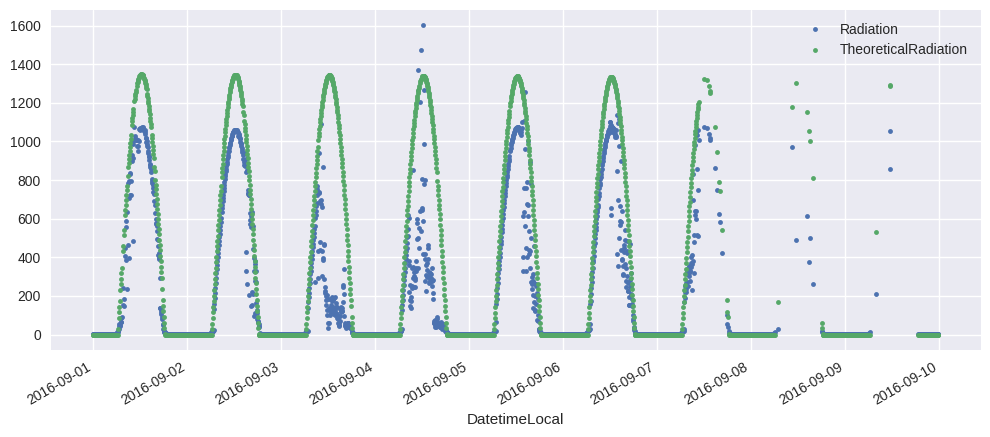

In [ ]:
df_prep[df_prep.DatetimeLocal.between('2016-09-01', '2016-09-10')].plot(x = 'DatetimeLocal', y = ['Radiation', 'TheoreticalRadiation'], figsize = (12, 5), style='.')
plt.legend()
plt.show()

### Comparación de variables numéricas

Con el fin de identificar relaciones entre las variables numericas existentes, se realizará un gráfico que permita identificar patrones entre estas. Para ello se hace uso de la función `seaborn.pairplot()` indicando además el listado de columnas con valores numéricos.

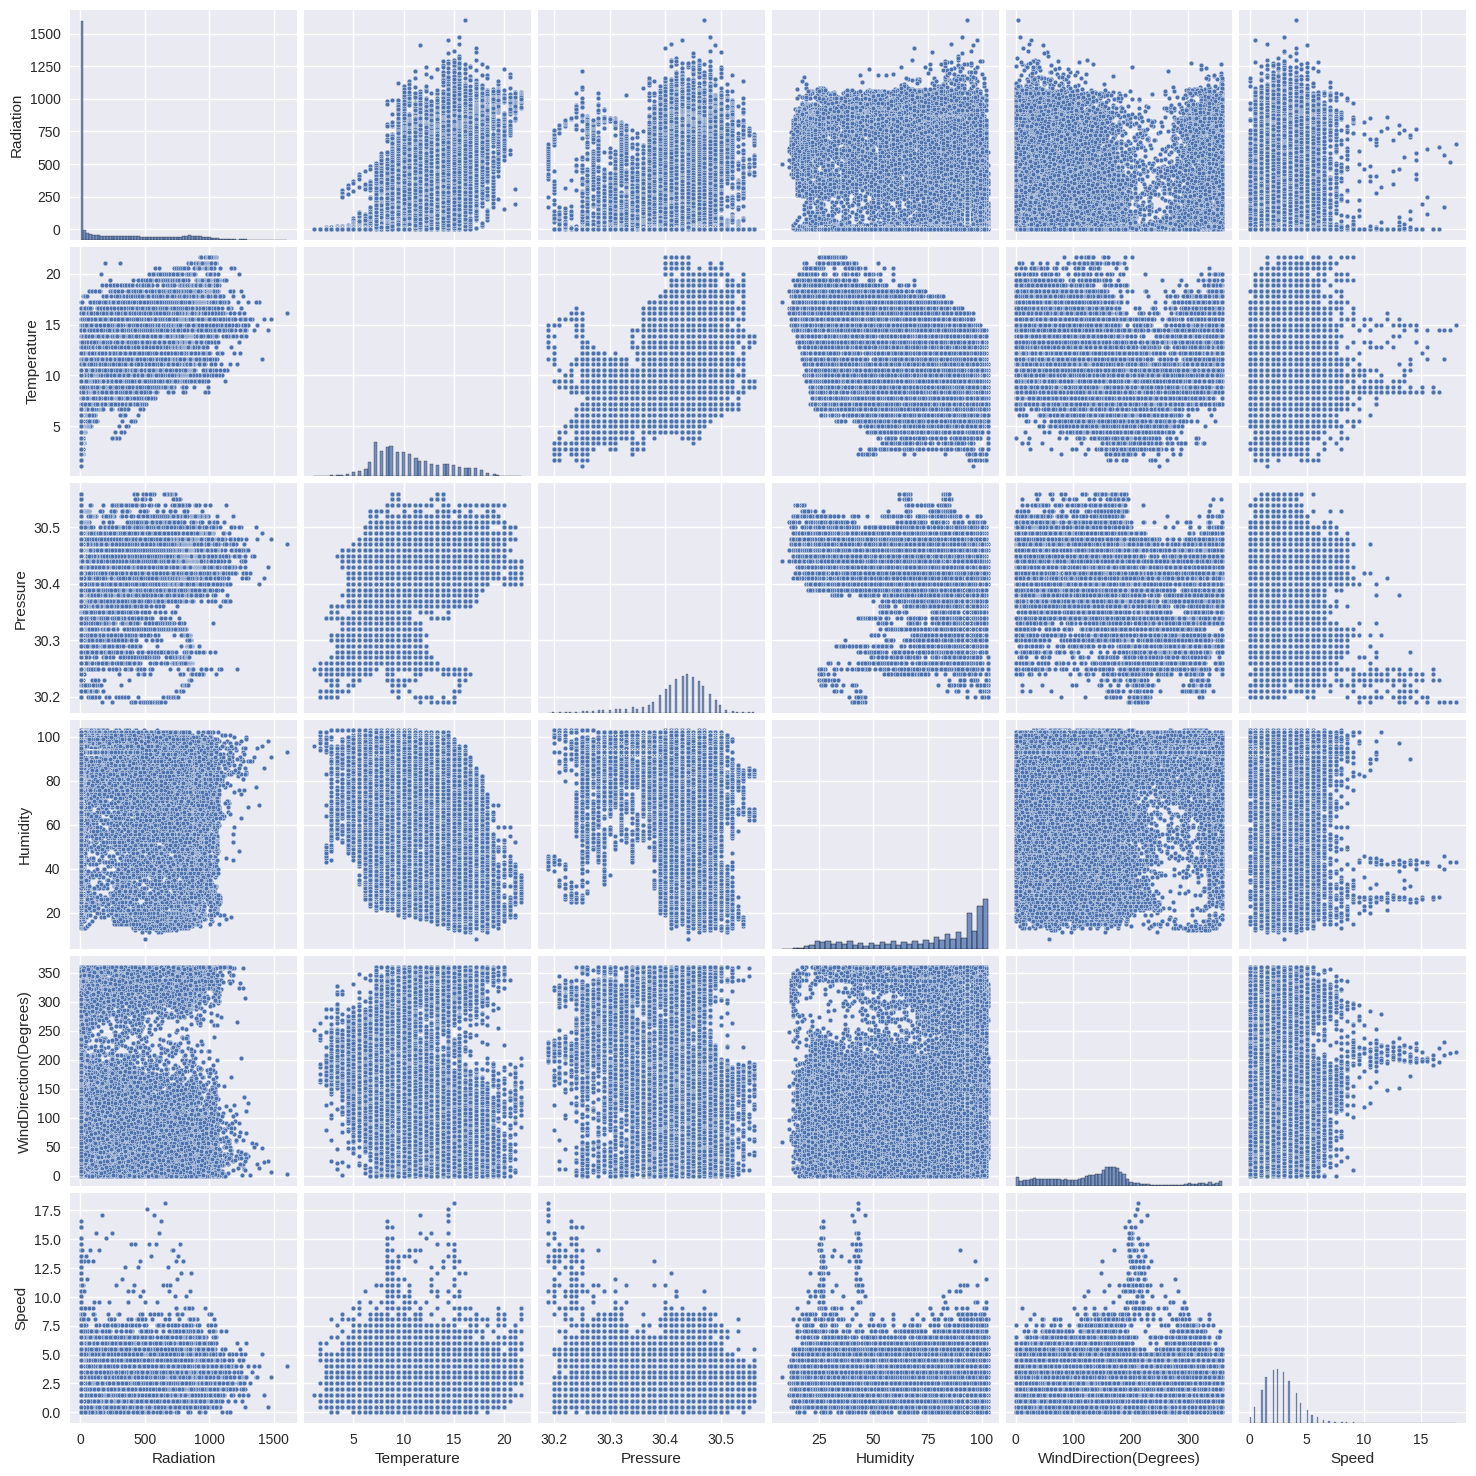

In [ ]:
# Listado de variables numéricas
numVars = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
sns.pairplot(df_prep[numVars], plot_kws={"s": 12})
plt.show()

Al observar el gráfico no se identifican patrones que indiquen algún tipo de relación facilemente visible entre las variables, a excepción de la temperatura respecto a la humedad relativa, donde parece existir una relación inversa.

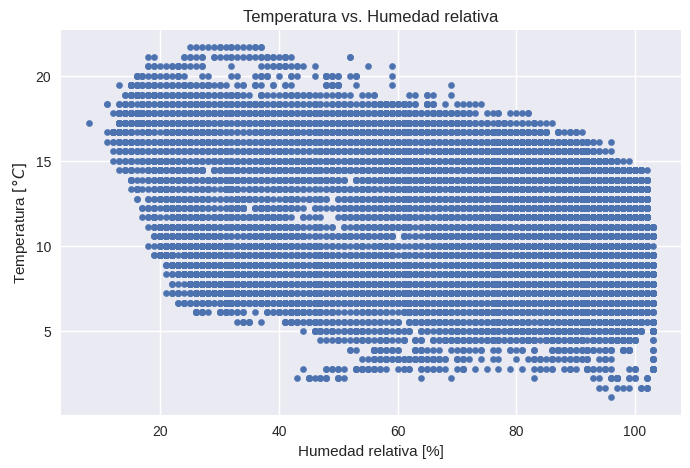

In [ ]:
# Gráfico de temperatura vs. humedad relativa
df_prep.plot.scatter(x='Humidity', y='Temperature',
                     grid = True,
                     label='Radiación',
                     figsize = (8, 5),
                     fontsize = 10,
                     legend = False)
plt.xlabel("Humedad relativa [%]")
plt.ylabel("Temperatura $[°C]$")
plt.title('Temperatura vs. Humedad relativa')
plt.show()

En cuanto a la distribución de los datos por variable se observa que:

* Tal como es de esperarse en cuanto a la radiación solar, la mayor parte de los datos son valores cercanos a 0 que corresponden a los espacios de tiempo de horario nocturno, donde la radiación es prácticamente nula.
* En cuanto a la temperatura, se observa que los valores de temperatura varían en sun mayoría en un rango entre 7.7 y 12.7°C teniendo momentos en los que alcanza temperaturas superiores a 20°C
* Tal como es de esperarse, la presión atmosférica permanece casi constante en valores cercanos a 30.4 a 30.5 Hg.
* Se observa cierta tendencia a una humedad relativa alta con una mayor cantidad de mediciones cercanas al 100%
* La dirección del viento presenta muchas variaciones de su ángulo de incidencia con una mayor tendencia a aproximarse con angulos entre 82.2 y 169.3°
* La velocidad media aproximada del viento es cercana 2.5 m/s.

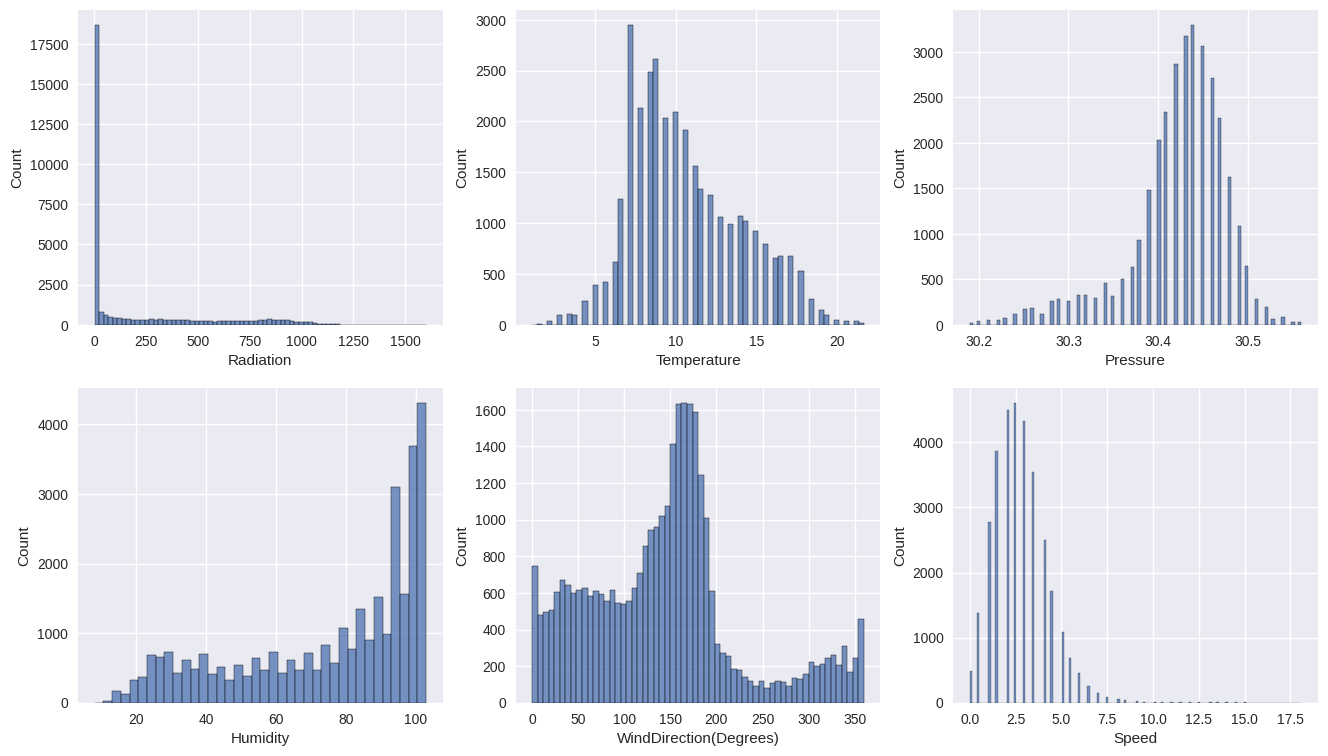

In [ ]:
# Distribución de las variables numéricas
fig, axes = plt.subplots(2, 3, figsize=(16,9))
for index, var in enumerate(numVars):
    sns.histplot(x = df_prep[var] , ax=axes[index//3, index%3])

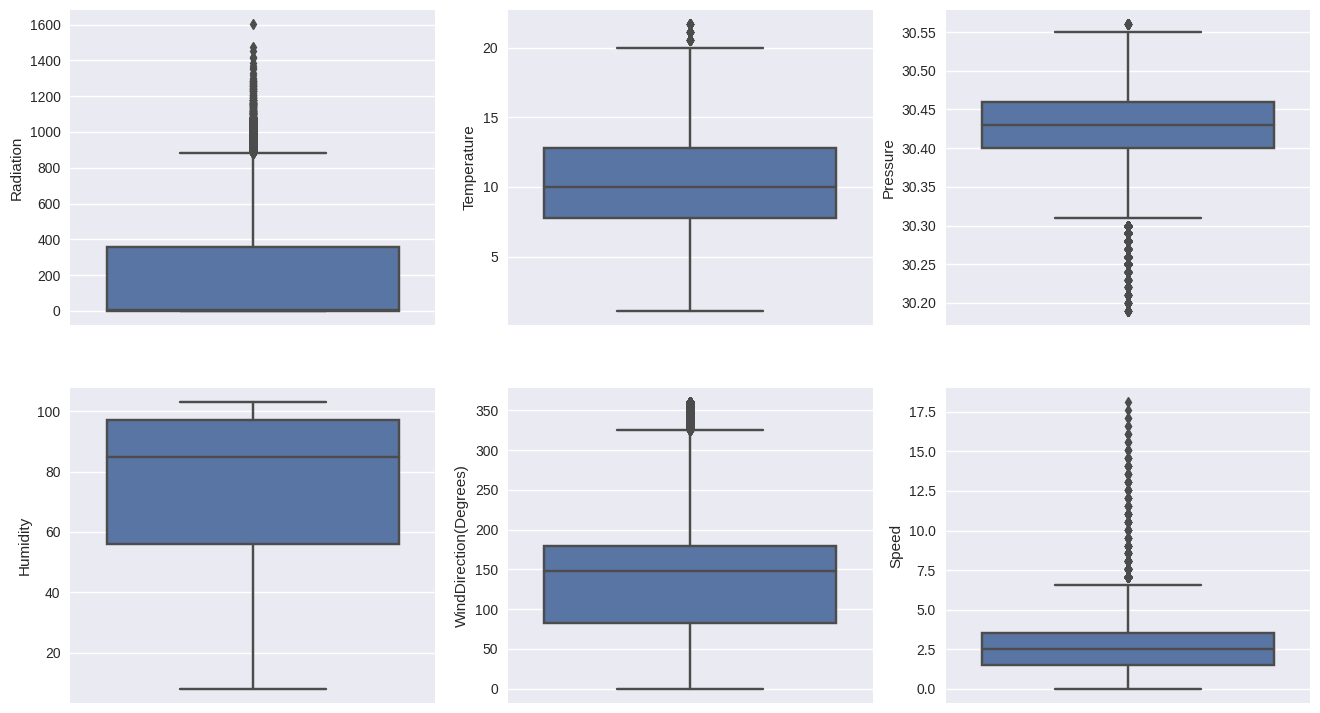

In [ ]:
# Distribución de las variables numéricas
fig, axes = plt.subplots(2, 3, figsize=(16,9))
for index, var in enumerate(numVars):
    sns.boxplot(y = df_prep[var] , ax=axes[index//3, index%3])

### Comportamiento de las variables a través del tiempo



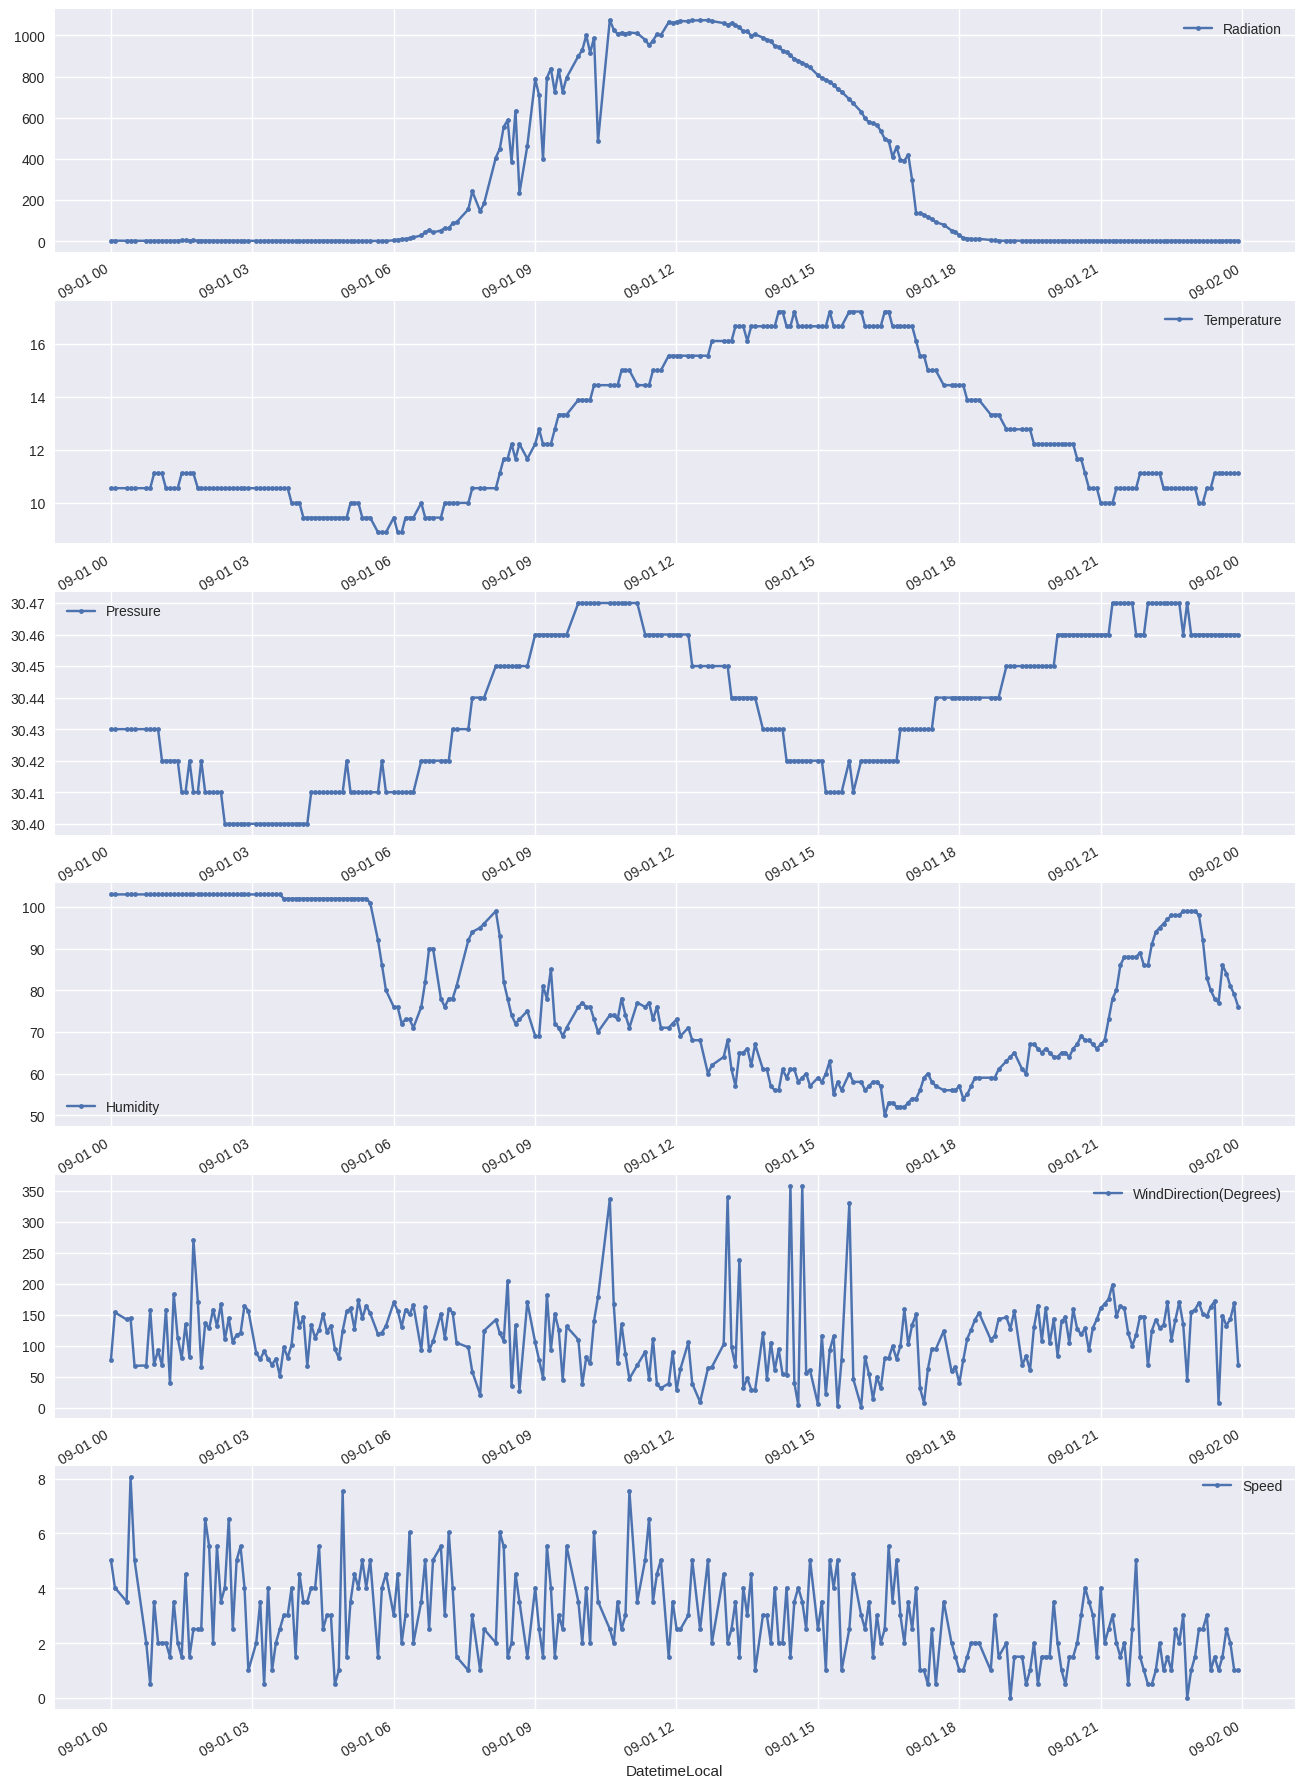

In [ ]:
# Comportamiento de las variables en el tiempo para un espacio de 1 día entre el 2016-09-01 y 2016-09-02
fig, axes = plt.subplots(6, 1, figsize=(16,25))
for index, var in enumerate(numVars):
    df_prep[df_prep.DatetimeLocal.between('2016-09-01', '2016-09-02')].plot(x = 'DatetimeLocal', y = var, style='.-', ax=axes[index])
    axes[index].set_title

Finalmente, luego de las transformaciones y analítica realizada sobre el conjuto de datos transformado se realiza la escritura del dataset preparado que será usado para el desarrollo de los modelos requeridos.

In [ ]:
# Guardado del dataset preparado en formato parquet para mantener el schema de datos
df_prep.to_parquet("dataset_preparado.parquet", compression = 'snappy')

In [ ]:
df = pd.read_parquet("dataset_preparado.parquet")

In [ ]:
df

,DatetimeUTC,DatetimeLocal,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,TheoreticalRadiation
0,2016-09-30 09:55:26,2016-09-29 23:55:26,1.21,8.888889,30.46,59,177.39,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
1,2016-09-30 09:50:23,2016-09-29 23:50:23,1.21,8.888889,30.46,58,176.78,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
2,2016-09-30 09:45:26,2016-09-29 23:45:26,1.23,8.888889,30.46,57,158.75,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
3,2016-09-30 09:40:21,2016-09-29 23:40:21,1.21,8.888889,30.46,60,137.71,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
4,2016-09-30 09:35:24,2016-09-29 23:35:24,1.17,8.888889,30.46,62,104.95,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01 10:20:04,2016-12-01 00:20:04,1.22,6.666667,30.43,102,145.42,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
32682,2016-12-01 10:15:01,2016-12-01 00:15:01,1.17,6.666667,30.42,102,117.78,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
32683,2016-12-01 10:10:01,2016-12-01 00:10:01,1.20,6.666667,30.42,102,145.19,4.023360,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
32684,2016-12-01 10:05:02,2016-12-01 00:05:02,1.23,6.666667,30.42,101,164.19,3.518205,2016-12-01 06:41:00,2016-12-01 17:42:00,0.0
